### REFERÊNCIA

In [ ]:
https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

In [5]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [7]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [8]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

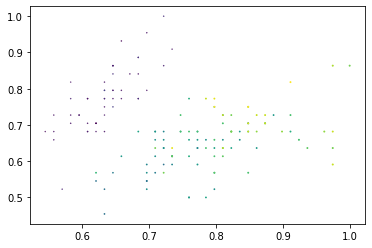

In [11]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

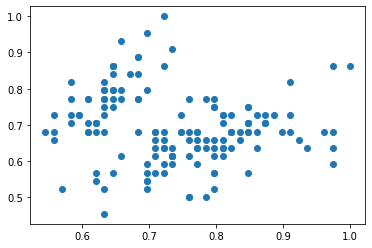

In [12]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

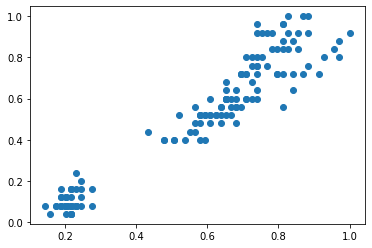

In [13]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [27]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [29]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

In [33]:
# number of clusters
K = 3
# fuziness valor 
m = 2
# membership
U = np.random.rand(iris_data_without_last_column.shape[0], K)
U # lembrando que os dados já foram normalizados

array([[0.2270739 , 0.51613585, 0.37399263],
       [0.24347678, 0.88887216, 0.00648387],
       [0.81627669, 0.31119324, 0.25911454],
       [0.4074818 , 0.14432565, 0.83775963],
       [0.37819643, 0.85305065, 0.82244326],
       [0.96302058, 0.27687566, 0.84060261],
       [0.45718448, 0.43741656, 0.28725048],
       [0.80638942, 0.65019144, 0.03865198],
       [0.57963908, 0.64083779, 0.95803053],
       [0.3819415 , 0.34998614, 0.92541265],
       [0.11034796, 0.52682604, 0.84010113],
       [0.66985962, 0.44234302, 0.77222703],
       [0.67021714, 0.84547938, 0.89695245],
       [0.94078815, 0.03075581, 0.73280823],
       [0.01037735, 0.92762843, 0.37335592],
       [0.79945642, 0.89376474, 0.77456619],
       [0.13636068, 0.05940814, 0.08098208],
       [0.72740519, 0.54327928, 0.08630865],
       [0.82087809, 0.56529708, 0.01868292],
       [0.7013363 , 0.83389491, 0.45939566],
       [0.41211725, 0.71824917, 0.59102767],
       [0.00133881, 0.35953804, 0.66343283],
       [0.

In [56]:
# calculo dos centroides
# envolve matriz
# soma da multiplicação de cada 

# precisamos de 3 centroides
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range (K):
        centroides[i,:] = np.sum((U[:, i] ** m)[:, np.newaxis] * iris_data_without_last_column, axis = 0)/np.sum(U[:, i] ** m)
    return centroides

In [66]:
def distancia_gaussiana(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a distância usando a função gaussiana entre as matrizes x e y.

    Parâmetros:
    - x, y: os pontos a serem comparados, sendo eles os dados e os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre x[i] e y[j].
    """
    print("Shapes em distancia_gaussiana:")
    print("x shape:", iris_data_without_last_column.shape)
    print("y shape:", centroides.shape)
    print()
    
    # tentando resolver o problema dimensional
    iris_data_without_last_column = iris_data_without_last_column.reshape(1, -1)
    
    #euclidiana = np.linalg.norm(iris_data_without_last_column[:, np.newaxis, :] - centroides, axis=1)  # Distâncias euclidianas entre todos os pares de pontos
    diferenca = iris_data_without_last_column - centroides
    euclidiana = np.sqrt(np.sum(diferenca**2))
    gaussian_values = np.exp(- (euclidiana**2) / (2 * sigma**2))  # Função gaussiana # dá pra escrever o sigma diferente se der erro
    return gaussian_values

In [69]:
def matriz_dg(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de distâncias usando a função gaussiana entre todos os pontos e os centroides.

    Parâmetros:
    - data: matriz representando os pontos a serem comparados.
    - centroides: matriz c/ os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre o ponto i e o centroide j.
    """
    print("Shapes em matriz_dg:")
    print("iris_data_without_last_column shape:", iris_data_without_last_column.shape)
    print("centroides shape:", centroides.shape)
    print()
    
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = distancia_gaussiana(iris_data_without_last_column[i], centroides[j], sigma)

    return distancias

In [70]:
sigma_value = 1.0
# Supondo que você já tenha definido K, U, m, sigma_value, iris_data_without_last_column e centroids

# Calcula a matriz de distâncias usando a função gaussian_distance_matrix
d_matriz = matriz_dg(iris_data_without_last_column, centroides, sigma_value)

# Exibe a matriz de distâncias
print("Matriz de Distâncias:")
print(d_matriz)

Shapes em matriz_dg:
iris_data_without_last_column shape: (150, 4)
centroides shape: (3, 4)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes 

In [72]:
#print(d_matriz) #supostamente, distância de cada ponto em relação a cada centroide

**OBSERVAÇÕES**
<br>uh to meio na dúvida aqui
<br> preciso que a distância seja calculada para cada ponto em relação a cada um dos centroides, mas não sei <br>se isso está acontecendo
<br>ACHO que é isso que está rolando sim

In [76]:
U_novo = np.zeros_like(d_matriz)

# Se você deseja iterar sobre K, você pode fazer algo assim:
for i in range(K):
    U_novo[:, i] = d_matriz[:, i]

# Ou simplesmente copiar todos os valores da matriz de distâncias para U_novo:
U_novo = d_matriz.copy()

In [78]:
U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
U_novo

array([[0.32694398, 0.35002864, 0.32302739],
       [0.3269991 , 0.34976899, 0.32323191],
       [0.32668054, 0.35052728, 0.32279219],
       [0.32690736, 0.34999687, 0.32309576],
       [0.32684774, 0.35026809, 0.32288417],
       [0.32787176, 0.34758993, 0.3245383 ],
       [0.3269308 , 0.3497803 , 0.32328889],
       [0.32704459, 0.34977776, 0.32317764],
       [0.32673031, 0.35033308, 0.32293661],
       [0.32683407, 0.35040764, 0.32275828],
       [0.32718181, 0.34955872, 0.32325948],
       [0.32704902, 0.34976628, 0.32318471],
       [0.32668234, 0.35071559, 0.32260207],
       [0.32599791, 0.35222597, 0.32177612],
       [0.32694077, 0.3501774 , 0.32288183],
       [0.32762672, 0.3482725 , 0.32410079],
       [0.32736932, 0.34870447, 0.32392621],
       [0.32719931, 0.34921662, 0.32358407],
       [0.32783489, 0.34789424, 0.32427087],
       [0.32721938, 0.34925378, 0.32352684],
       [0.32753945, 0.3486846 , 0.32377594],
       [0.32750915, 0.34833728, 0.32415357],
       [0.

In [83]:
labels = np.argmax(U_novo, axis = 1)
labels
# class of each dataset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

AttributeError: 'PathCollection' object has no property 'd_matriz'

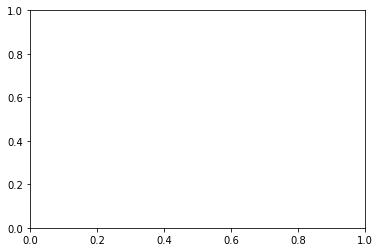

In [86]:
sns.scatterplot(d_matriz = d_matriz, x = d_matriz[:, 0], y = d_matriz[:, 1], hue = labels, palette = 'nipy_spectral')